# Hyperparameter Optimisation Trial 1

Trial with the first optimal configuration found during hyperparameter optimisation

## Run notebook from project root

Adjust `path_to_top_dir = "../../"`

In [1]:
import sys
import os

path_to_top_dir = "../../"
sys.path.append(os.path.abspath(path_to_top_dir))

In [2]:
root_path = os.path.abspath(path_to_top_dir)
root_path

'c:\\Users\\paulj\\Desktop\\Master'

In [3]:
os.getcwd()

'c:\\Users\\paulj\\Desktop\\Master\\trials\\hyperparameter_tuning'

## Imports

In [4]:
import pathlib
from torch_scatter import scatter
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
from tensorboard.backend.event_processing import event_accumulator
import sqlite3
import numpy as np
from rdkit import Chem
import shutil
from omegaconf import OmegaConf
from collections import defaultdict

In [5]:
from src.submodels.gflownet.config import Config,init_empty
import torch
import gc
from src.model.scent_trainer import ScentTrainer

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.



############################################################
#                     Initialize MCFs                      #
############################################################

Filter                                        Min        Max
------------------------------------------------------------
LogP                                         0.06       4.91
Molecular Weight                           100.12     282.46
HBAB + HBD                                   0.00       5.00
TPSA                                         0.00      63.32
Rotatable Bonds                              0.00      11.00
NO2 Groups                                   0.00       0.00
Heteroatoms                                  0.00       4.00
Aromatic Rings                               0.00       1.00
Atom Count                                   0.00      20.00
Triple Bonds                                 0.00       0.00
Oxygen Chain Length                          0.00       1.00

#####################

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Configure

Best hyperparameters

In [6]:
best_params={
    'algo_variant': 1, 
    'algo_sampling_tau': 0.9586388653961274, 
    'algo_Z_learning_rate': 0.0009172472645240433, 
    'opt_learning_rate': 0.00033456094523569453, 
    'opt_momentum': 0.651294024078677, 
    'opt_clip_grad_param': 9.906781758764712, 
    'opt_weight_decay': 3.9731330248837407e-07
    }

Configuration

In [7]:

config = init_empty(Config())

# For CPU
config.device = torch.device('cpu')
config.num_workers = 0
config.log_dir =os.path.join(root_path, "logs/hpo1/")
config.overwrite_existing_exp=False

config.validate_every=1000
config.algo.num_from_policy = 32
config.algo.num_from_dataset = 32
config.algo.valid_num_from_policy= 0
config.algo.valid_num_from_dataset= 64
config.num_training_steps = 6000 #10_000
config.print_every =1
config.seed = 1
config.store_all_checkpoints = True


config.algo.tb.do_parameterize_p_b = False # Dont know how to load the model with this parameter = True
config.num_validation_gen_steps = 1
#config.overwrite_existing_exp=True
config.algo.tb.mask_invalid_rewards = False
config.algo.tb.std_cut_losses = False
config.algo.tb.std_cut_scale = 1


# OPTUNA PARAMETERS
# Algo
config.algo.tb.variant = best_params["algo_variant"]
config.algo.sampling_tau = best_params["algo_sampling_tau"]
config.algo.tb.Z_learning_rate = best_params["algo_Z_learning_rate"]
# Opt
config.opt.clip_grad_param = best_params["opt_clip_grad_param"]
config.opt.momentum = best_params["opt_momentum"]
config.opt.learning_rate = best_params["opt_learning_rate"]
config.opt.weight_decay = best_params["opt_weight_decay"]

## Train

In [8]:
gc.collect()
trainer = ScentTrainer(config, print_config=True)


trainer.run()
gc.collect()



Hyperparameters:

desc: noDesc
log_dir: c:\Users\paulj\Desktop\Master\logs/hpo1/
device: cpu
seed: 1
validate_every: 1000
checkpoint_every: null
store_all_checkpoints: true
print_every: 1
start_at_step: 0
num_final_gen_steps: null
num_validation_gen_steps: 1
num_training_steps: 6000
num_workers: 0
hostname: LAPTOP-JIE0TNQT
pickle_mp_messages: false
git_hash: 905f5a0
overwrite_existing_exp: false
algo:
  method: TB
  num_from_policy: 32
  num_from_dataset: 32
  valid_num_from_policy: 0
  valid_num_from_dataset: 64
  max_len: 128
  max_nodes: 20
  max_edges: 128
  illegal_action_logreward: -75.0
  train_random_action_prob: 0.001
  train_det_after: null
  valid_random_action_prob: 0.0
  sampling_tau: 0.9586388653961274
  tb:
    bootstrap_own_reward: false
    epsilon: null
    reward_loss_multiplier: 1.0
    variant: SubTB1
    do_correct_idempotent: false
    do_parameterize_p_b: false
    do_predict_n: false
    do_sample_p_b: false
    do_length_normalize: false
    subtb_max_len: 1

[16:52:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[16:52:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[16:52:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[16:52:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 16:53:06 - INFO - logger - iteration 138 : offline_loss:355.48 online_loss:217.29 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-95.19 invalid_losses:248.31 backward_vs_unif:0.00 logZ:1.67 loss:286.39 n_loss:0.00 tb_loss:286.39 batch_entropy:65.38 traj_lens:21.81 grad_norm:594.80 grad_norm_clip:9.91 sampled_reward_avg:0.10 train_time:9.71 time_spent:20.35
26/05/2025 16:53:26 - INFO - logger - iteration 139 : offline_loss:137.92 online_loss:166.09 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-81.52 invalid_losses:175.30 backward_vs_unif:0.00 logZ:2.38 loss:152.00 n_loss:0.00 tb_loss:152.00 batch_entropy:60.91 traj_lens:21.66 grad_norm:686.88 grad_norm_clip:9.91 sampled_reward_avg:0.05 train_time:10.02 time_spent:20.35
26/05/2025 16:53:44 - INFO - logger - iteration 140 : offline_loss:127.74 online_loss:302.89 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-118.38 invalid_losses:356.69 backward_vs_unif:0.00 logZ:1.81 loss:215.32 n_loss:0.

[16:58:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[16:58:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 16:58:52 - INFO - logger - iteration 155 : offline_loss:33.42 online_loss:425.13 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-74.23 invalid_losses:536.82 backward_vs_unif:0.00 logZ:3.64 loss:229.27 n_loss:0.00 tb_loss:229.27 batch_entropy:52.89 traj_lens:19.25 grad_norm:1192.13 grad_norm_clip:9.91 sampled_reward_avg:0.14 train_time:7.84 time_spent:16.64
26/05/2025 16:59:13 - INFO - logger - iteration 156 : offline_loss:60.14 online_loss:263.77 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-97.06 invalid_losses:280.24 backward_vs_unif:0.00 logZ:2.83 loss:161.95 n_loss:0.00 tb_loss:161.95 batch_entropy:65.38 traj_lens:21.41 grad_norm:1120.70 grad_norm_clip:9.91 sampled_reward_avg:0.04 train_time:8.96 time_spent:20.13
26/05/2025 16:59:37 - INFO - logger - iteration 157 : offline_loss:98.39 online_loss:335.10 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-140.79 invalid_losses:344.59 backward_vs_unif:0.00 logZ:1.32 loss:216.74 n_loss:0.00

[17:26:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:26:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:26:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[17:26:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 17:26:30 - INFO - logger - iteration 214 : offline_loss:5127.04 online_loss:225.81 reward_loss:0.00 invalid_trajectories:1.00 invalid_logprob:-192.52 invalid_losses:225.81 backward_vs_unif:0.00 logZ:6.44 loss:2676.43 n_loss:0.00 tb_loss:2676.43 batch_entropy:134.12 traj_lens:35.28 grad_norm:9720.86 grad_norm_clip:9.91 sampled_reward_avg:0.00 train_time:20.33 time_spent:44.85
26/05/2025 17:27:12 - INFO - logger - iteration 215 : offline_loss:38078.32 online_loss:275.76 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-187.87 invalid_losses:283.93 backward_vs_unif:0.00 logZ:7.28 loss:19177.04 n_loss:0.00 tb_loss:19177.04 batch_entropy:168.60 traj_lens:35.30 grad_norm:18114.16 grad_norm_clip:9.91 sampled_reward_avg:0.02 train_time:20.17 time_spent:42.74
26/05/2025 17:27:49 - INFO - logger - iteration 216 : offline_loss:94.54 online_loss:303.35 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-170.78 invalid_losses:321.81 backward_vs_unif:0.00 logZ:8.60 loss:

[18:55:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:55:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:55:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:55:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 18:55:16 - INFO - logger - iteration 569 : offline_loss:4092.72 online_loss:143.94 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-100.34 invalid_losses:180.89 backward_vs_unif:0.00 logZ:0.48 loss:2118.33 n_loss:0.00 tb_loss:2118.33 batch_entropy:97.66 traj_lens:22.98 grad_norm:8377.25 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:9.76 time_spent:20.98
26/05/2025 18:55:37 - INFO - logger - iteration 570 : offline_loss:227.18 online_loss:260.79 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-91.09 invalid_losses:292.26 backward_vs_unif:0.00 logZ:2.03 loss:243.99 n_loss:0.00 tb_loss:243.99 batch_entropy:66.18 traj_lens:22.75 grad_norm:500.81 grad_norm_clip:9.91 sampled_reward_avg:0.08 train_time:9.27 time_spent:20.67
26/05/2025 18:55:59 - INFO - logger - iteration 571 : offline_loss:54.42 online_loss:244.88 reward_loss:0.00 invalid_trajectories:0.97 invalid_logprob:-104.24 invalid_losses:250.90 backward_vs_unif:0.00 logZ:2.14 loss:149.65 n_loss

[21:28:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:28:41] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:28:42] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:28:42] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 21:28:54 - INFO - logger - iteration 1236 : offline_loss:43.49 online_loss:185.92 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-84.26 invalid_losses:210.50 backward_vs_unif:0.00 logZ:-1.15 loss:114.71 n_loss:0.00 tb_loss:114.71 batch_entropy:56.60 traj_lens:21.41 grad_norm:608.55 grad_norm_clip:9.91 sampled_reward_avg:0.11 train_time:8.84 time_spent:19.82
26/05/2025 21:29:13 - INFO - logger - iteration 1237 : offline_loss:891.66 online_loss:150.02 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-92.56 invalid_losses:173.41 backward_vs_unif:0.00 logZ:-1.07 loss:520.84 n_loss:0.00 tb_loss:520.84 batch_entropy:65.03 traj_lens:21.00 grad_norm:5228.37 grad_norm_clip:9.91 sampled_reward_avg:0.15 train_time:8.56 time_spent:18.67
26/05/2025 21:29:33 - INFO - logger - iteration 1238 : offline_loss:364.62 online_loss:82.92 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-113.68 invalid_losses:87.81 backward_vs_unif:0.00 logZ:-0.82 loss:223.77 n_loss

[21:33:53] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:33:53] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:33:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:33:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 21:34:11 - INFO - logger - iteration 1251 : offline_loss:39.61 online_loss:163.53 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-119.94 invalid_losses:177.54 backward_vs_unif:0.00 logZ:1.10 loss:101.57 n_loss:0.00 tb_loss:101.57 batch_entropy:74.61 traj_lens:24.84 grad_norm:1513.01 grad_norm_clip:9.91 sampled_reward_avg:0.06 train_time:11.12 time_spent:23.87


[21:34:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:34:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:34:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[21:34:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 21:34:31 - INFO - logger - iteration 1252 : offline_loss:61.51 online_loss:149.96 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-96.28 invalid_losses:168.13 backward_vs_unif:0.00 logZ:1.14 loss:105.74 n_loss:0.00 tb_loss:105.74 batch_entropy:61.34 traj_lens:21.70 grad_norm:1104.47 grad_norm_clip:9.91 sampled_reward_avg:0.08 train_time:8.59 time_spent:19.58
26/05/2025 21:34:54 - INFO - logger - iteration 1253 : offline_loss:754.72 online_loss:155.97 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-154.16 invalid_losses:193.78 backward_vs_unif:0.00 logZ:1.00 loss:455.35 n_loss:0.00 tb_loss:455.35 batch_entropy:90.60 traj_lens:24.39 grad_norm:5220.31 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:10.91 time_spent:23.45
26/05/2025 21:35:19 - INFO - logger - iteration 1254 : offline_loss:77.48 online_loss:113.84 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-131.79 invalid_losses:123.45 backward_vs_unif:0.00 logZ:1.17 loss:95.66 n_loss

[22:58:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:58:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:58:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[22:58:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


26/05/2025 22:58:15 - INFO - logger - iteration 1519 : offline_loss:25.84 online_loss:344.22 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-160.26 invalid_losses:420.84 backward_vs_unif:0.00 logZ:5.12 loss:185.03 n_loss:0.00 tb_loss:185.03 batch_entropy:86.00 traj_lens:26.56 grad_norm:6036.73 grad_norm_clip:9.91 sampled_reward_avg:0.13 train_time:11.99 time_spent:26.69
26/05/2025 22:58:41 - INFO - logger - iteration 1520 : offline_loss:248.29 online_loss:180.34 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-147.63 invalid_losses:245.46 backward_vs_unif:0.00 logZ:5.01 loss:214.32 n_loss:0.00 tb_loss:214.32 batch_entropy:82.01 traj_lens:24.95 grad_norm:2411.62 grad_norm_clip:9.91 sampled_reward_avg:0.19 train_time:11.25 time_spent:25.49
26/05/2025 22:59:09 - INFO - logger - iteration 1521 : offline_loss:917.71 online_loss:168.41 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-160.50 invalid_losses:238.71 backward_vs_unif:0.00 logZ:5.28 loss:543.06 n_

[00:03:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:03:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:03:08] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:03:08] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:03:20 - INFO - logger - iteration 1754 : offline_loss:985.43 online_loss:256.46 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-95.59 invalid_losses:288.44 backward_vs_unif:0.00 logZ:2.11 loss:620.94 n_loss:0.00 tb_loss:620.94 batch_entropy:75.18 traj_lens:22.28 grad_norm:5858.34 grad_norm_clip:9.91 sampled_reward_avg:0.09 train_time:9.12 time_spent:19.66
27/05/2025 00:03:38 - INFO - logger - iteration 1755 : offline_loss:331.09 online_loss:200.23 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-87.38 invalid_losses:246.98 backward_vs_unif:0.00 logZ:1.96 loss:265.66 n_loss:0.00 tb_loss:265.66 batch_entropy:63.52 traj_lens:20.95 grad_norm:2227.32 grad_norm_clip:9.91 sampled_reward_avg:0.14 train_time:8.12 time_spent:18.15
27/05/2025 00:03:55 - INFO - logger - iteration 1756 : offline_loss:1071.93 online_loss:205.41 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-84.71 invalid_losses:271.90 backward_vs_unif:0.00 logZ:1.74 loss:638.67 n_los

[00:21:25] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:21:25] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:21:30] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:21:30] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:21:46 - INFO - logger - iteration 1805 : offline_loss:27.39 online_loss:174.84 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-177.36 invalid_losses:226.11 backward_vs_unif:0.00 logZ:3.31 loss:101.12 n_loss:0.00 tb_loss:101.12 batch_entropy:86.98 traj_lens:26.78 grad_norm:1934.55 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:12.03 time_spent:28.27
27/05/2025 00:22:13 - INFO - logger - iteration 1806 : offline_loss:24.67 online_loss:220.73 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-153.21 invalid_losses:258.37 backward_vs_unif:0.00 logZ:3.72 loss:122.70 n_loss:0.00 tb_loss:122.70 batch_entropy:84.46 traj_lens:27.19 grad_norm:766.72 grad_norm_clip:9.91 sampled_reward_avg:0.11 train_time:12.44 time_spent:27.67
27/05/2025 00:22:42 - INFO - logger - iteration 1807 : offline_loss:27.15 online_loss:256.59 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-165.59 invalid_losses:279.71 backward_vs_unif:0.00 logZ:3.30 loss:141.87 n_los

[00:39:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:39:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:39:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:39:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:39:40 - INFO - logger - iteration 1839 : offline_loss:69.73 online_loss:234.17 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-193.76 invalid_losses:294.59 backward_vs_unif:0.00 logZ:2.66 loss:151.95 n_loss:0.00 tb_loss:151.95 batch_entropy:98.93 traj_lens:30.66 grad_norm:2449.63 grad_norm_clip:9.91 sampled_reward_avg:0.14 train_time:15.15 time_spent:34.69
27/05/2025 00:40:18 - INFO - logger - iteration 1840 : offline_loss:340.26 online_loss:134.26 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-201.07 invalid_losses:159.32 backward_vs_unif:0.00 logZ:2.49 loss:237.26 n_loss:0.00 tb_loss:237.26 batch_entropy:108.77 traj_lens:33.38 grad_norm:2769.21 grad_norm_clip:9.91 sampled_reward_avg:0.12 train_time:17.06 time_spent:38.23


[00:40:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:40:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:40:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:40:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:40:53 - INFO - logger - iteration 1841 : offline_loss:240.96 online_loss:123.99 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-206.23 invalid_losses:161.38 backward_vs_unif:0.00 logZ:2.58 loss:182.47 n_loss:0.00 tb_loss:182.47 batch_entropy:101.35 traj_lens:31.36 grad_norm:1757.63 grad_norm_clip:9.91 sampled_reward_avg:0.18 train_time:15.50 time_spent:34.47
27/05/2025 00:41:28 - INFO - logger - iteration 1842 : offline_loss:33.45 online_loss:148.13 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-185.00 invalid_losses:182.58 backward_vs_unif:0.00 logZ:3.04 loss:90.79 n_loss:0.00 tb_loss:90.79 batch_entropy:94.33 traj_lens:31.00 grad_norm:631.69 grad_norm_clip:9.91 sampled_reward_avg:0.13 train_time:15.25 time_spent:35.16
27/05/2025 00:42:01 - INFO - logger - iteration 1843 : offline_loss:4085.05 online_loss:115.87 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-212.09 invalid_losses:160.90 backward_vs_unif:0.00 logZ:3.55 loss:2100.46 n_

[00:44:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:44:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:44:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:44:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:44:45 - INFO - logger - iteration 1848 : offline_loss:28.52 online_loss:198.25 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-173.07 invalid_losses:222.91 backward_vs_unif:0.00 logZ:3.24 loss:113.38 n_loss:0.00 tb_loss:113.38 batch_entropy:94.13 traj_lens:30.38 grad_norm:378.64 grad_norm_clip:9.91 sampled_reward_avg:0.08 train_time:14.46 time_spent:33.29
27/05/2025 00:45:14 - INFO - logger - iteration 1849 : offline_loss:61.84 online_loss:138.08 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-173.08 invalid_losses:192.32 backward_vs_unif:0.00 logZ:3.06 loss:99.96 n_loss:0.00 tb_loss:99.96 batch_entropy:85.50 traj_lens:28.12 grad_norm:741.25 grad_norm_clip:9.91 sampled_reward_avg:0.21 train_time:12.99 time_spent:28.97
27/05/2025 00:45:44 - INFO - logger - iteration 1850 : offline_loss:23.09 online_loss:138.00 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-174.63 invalid_losses:176.69 backward_vs_unif:0.00 logZ:3.20 loss:80.55 n_loss:0.

[00:45:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:45:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:45:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:45:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:46:15 - INFO - logger - iteration 1851 : offline_loss:50.80 online_loss:274.45 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-181.63 invalid_losses:292.22 backward_vs_unif:0.00 logZ:3.43 loss:162.62 n_loss:0.00 tb_loss:162.62 batch_entropy:103.68 traj_lens:30.19 grad_norm:6961.70 grad_norm_clip:9.91 sampled_reward_avg:0.04 train_time:14.03 time_spent:31.02
27/05/2025 00:46:47 - INFO - logger - iteration 1852 : offline_loss:73.57 online_loss:146.48 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-215.54 invalid_losses:197.25 backward_vs_unif:0.00 logZ:3.31 loss:110.03 n_loss:0.00 tb_loss:110.03 batch_entropy:101.40 traj_lens:29.86 grad_norm:3542.78 grad_norm_clip:9.91 sampled_reward_avg:0.18 train_time:14.36 time_spent:32.34
27/05/2025 00:47:13 - INFO - logger - iteration 1853 : offline_loss:2060.67 online_loss:325.34 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-125.65 invalid_losses:396.32 backward_vs_unif:0.00 logZ:3.14 loss:1193.00

[00:49:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:49:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:49:48 - INFO - logger - iteration 1859 : offline_loss:27.94 online_loss:169.03 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-131.25 invalid_losses:229.00 backward_vs_unif:0.00 logZ:2.97 loss:98.48 n_loss:0.00 tb_loss:98.48 batch_entropy:70.40 traj_lens:25.48 grad_norm:1351.09 grad_norm_clip:9.91 sampled_reward_avg:0.22 train_time:10.53 time_spent:24.15


[00:49:59] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:49:59] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:50:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:50:00] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:50:17 - INFO - logger - iteration 1860 : offline_loss:908.58 online_loss:184.24 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-167.44 invalid_losses:237.10 backward_vs_unif:0.00 logZ:3.14 loss:546.41 n_loss:0.00 tb_loss:546.41 batch_entropy:100.41 traj_lens:28.70 grad_norm:609.80 grad_norm_clip:9.91 sampled_reward_avg:0.16 train_time:12.81 time_spent:28.79


[00:50:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:50:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:50:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[00:50:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 00:50:54 - INFO - logger - iteration 1861 : offline_loss:28.21 online_loss:189.31 reward_loss:0.00 invalid_trajectories:0.94 invalid_logprob:-192.76 invalid_losses:201.17 backward_vs_unif:0.00 logZ:4.61 loss:108.76 n_loss:0.00 tb_loss:108.76 batch_entropy:111.12 traj_lens:33.86 grad_norm:2342.57 grad_norm_clip:9.91 sampled_reward_avg:0.04 train_time:16.51 time_spent:37.09
27/05/2025 00:51:22 - INFO - logger - iteration 1862 : offline_loss:21.44 online_loss:234.70 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-148.15 invalid_losses:266.27 backward_vs_unif:0.00 logZ:5.72 loss:128.07 n_loss:0.00 tb_loss:128.07 batch_entropy:86.50 traj_lens:28.92 grad_norm:2350.25 grad_norm_clip:9.91 sampled_reward_avg:0.08 train_time:12.59 time_spent:28.35
27/05/2025 00:51:51 - INFO - logger - iteration 1863 : offline_loss:27.62 online_loss:241.51 reward_loss:0.00 invalid_trajectories:0.91 invalid_logprob:-146.24 invalid_losses:264.54 backward_vs_unif:0.00 logZ:6.24 loss:134.57 n_l

[02:23:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:23:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:23:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[02:23:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 02:24:01 - INFO - logger - iteration 2207 : offline_loss:88.97 online_loss:236.46 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-85.18 invalid_losses:344.76 backward_vs_unif:0.00 logZ:0.69 loss:162.71 n_loss:0.00 tb_loss:162.71 batch_entropy:54.09 traj_lens:17.61 grad_norm:3414.48 grad_norm_clip:9.91 sampled_reward_avg:0.22 train_time:5.92 time_spent:13.71
27/05/2025 02:24:15 - INFO - logger - iteration 2208 : offline_loss:120.41 online_loss:239.58 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-78.01 invalid_losses:325.25 backward_vs_unif:0.00 logZ:0.15 loss:180.00 n_loss:0.00 tb_loss:180.00 batch_entropy:52.85 traj_lens:17.20 grad_norm:3156.16 grad_norm_clip:9.91 sampled_reward_avg:0.21 train_time:5.69 time_spent:13.95
27/05/2025 02:24:30 - INFO - logger - iteration 2209 : offline_loss:51.61 online_loss:220.45 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-82.91 invalid_losses:302.65 backward_vs_unif:0.00 logZ:-0.06 loss:136.03 n_loss:

[03:32:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:32:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:32:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:32:56] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 03:33:09 - INFO - logger - iteration 2418 : offline_loss:31.51 online_loss:187.69 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-128.50 invalid_losses:279.67 backward_vs_unif:0.00 logZ:4.79 loss:109.60 n_loss:0.00 tb_loss:109.60 batch_entropy:66.08 traj_lens:23.03 grad_norm:2222.98 grad_norm_clip:9.91 sampled_reward_avg:0.21 train_time:9.63 time_spent:21.85
27/05/2025 03:33:27 - INFO - logger - iteration 2419 : offline_loss:69.79 online_loss:201.40 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-96.43 invalid_losses:329.38 backward_vs_unif:0.00 logZ:4.65 loss:135.59 n_loss:0.00 tb_loss:135.59 batch_entropy:52.55 traj_lens:19.58 grad_norm:884.92 grad_norm_clip:9.91 sampled_reward_avg:0.26 train_time:7.45 time_spent:17.71
27/05/2025 03:33:47 - INFO - logger - iteration 2420 : offline_loss:43.66 online_loss:110.77 reward_loss:0.00 invalid_trajectories:0.44 invalid_logprob:-141.14 invalid_losses:234.43 backward_vs_unif:0.00 logZ:4.44 loss:77.22 n_loss:0.

[03:41:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:41:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:41:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[03:41:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 03:41:18 - INFO - logger - iteration 2444 : offline_loss:922.16 online_loss:139.49 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-102.27 invalid_losses:223.87 backward_vs_unif:0.00 logZ:3.60 loss:530.83 n_loss:0.00 tb_loss:530.83 batch_entropy:62.60 traj_lens:19.89 grad_norm:4728.06 grad_norm_clip:9.91 sampled_reward_avg:0.26 train_time:7.53 time_spent:17.88
27/05/2025 03:41:39 - INFO - logger - iteration 2445 : offline_loss:24.84 online_loss:113.92 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-144.02 invalid_losses:184.56 backward_vs_unif:0.00 logZ:3.62 loss:69.38 n_loss:0.00 tb_loss:69.38 batch_entropy:64.18 traj_lens:22.16 grad_norm:1213.97 grad_norm_clip:9.91 sampled_reward_avg:0.28 train_time:8.90 time_spent:20.45
27/05/2025 03:41:58 - INFO - logger - iteration 2446 : offline_loss:43.15 online_loss:169.95 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-109.00 invalid_losses:249.49 backward_vs_unif:0.00 logZ:3.70 loss:106.55 n_loss:

[04:40:39] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[04:40:39] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 10


27/05/2025 04:40:56 - INFO - logger - iteration 2668 : offline_loss:223.56 online_loss:123.90 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-161.48 invalid_losses:183.69 backward_vs_unif:0.00 logZ:4.65 loss:173.73 n_loss:0.00 tb_loss:173.73 batch_entropy:78.29 traj_lens:25.70 grad_norm:543.50 grad_norm_clip:9.91 sampled_reward_avg:0.24 train_time:12.03 time_spent:26.66
27/05/2025 04:41:21 - INFO - logger - iteration 2669 : offline_loss:24.46 online_loss:177.11 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-136.96 invalid_losses:219.80 backward_vs_unif:0.00 logZ:4.88 loss:100.79 n_loss:0.00 tb_loss:100.79 batch_entropy:73.64 traj_lens:25.30 grad_norm:296.26 grad_norm_clip:9.91 sampled_reward_avg:0.14 train_time:11.39 time_spent:25.42
27/05/2025 04:41:43 - INFO - logger - iteration 2670 : offline_loss:24.83 online_loss:116.11 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-134.59 invalid_losses:185.10 backward_vs_unif:0.00 logZ:4.50 loss:70.47 n_loss

[05:29:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:29:06] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:29:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:29:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 05:29:21 - INFO - logger - iteration 2845 : offline_loss:28.33 online_loss:209.90 reward_loss:0.00 invalid_trajectories:0.88 invalid_logprob:-121.48 invalid_losses:236.84 backward_vs_unif:0.00 logZ:2.57 loss:119.11 n_loss:0.00 tb_loss:119.11 batch_entropy:73.73 traj_lens:25.45 grad_norm:1379.08 grad_norm_clip:9.91 sampled_reward_avg:0.08 train_time:11.16 time_spent:25.42
27/05/2025 05:29:48 - INFO - logger - iteration 2846 : offline_loss:528.31 online_loss:148.02 reward_loss:0.00 invalid_trajectories:0.75 invalid_logprob:-146.32 invalid_losses:191.67 backward_vs_unif:0.00 logZ:2.41 loss:338.16 n_loss:0.00 tb_loss:338.16 batch_entropy:83.01 traj_lens:25.19 grad_norm:1777.53 grad_norm_clip:9.91 sampled_reward_avg:0.17 train_time:11.71 time_spent:26.81
27/05/2025 05:30:19 - INFO - logger - iteration 2847 : offline_loss:288.02 online_loss:178.46 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-156.71 invalid_losses:207.74 backward_vs_unif:0.00 logZ:2.53 loss:233.24 n_

[05:33:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:33:16] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:33:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:33:18] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 05:33:34 - INFO - logger - iteration 2854 : offline_loss:27.73 online_loss:160.98 reward_loss:0.00 invalid_trajectories:0.84 invalid_logprob:-140.91 invalid_losses:189.21 backward_vs_unif:0.00 logZ:3.44 loss:94.35 n_loss:0.00 tb_loss:94.35 batch_entropy:78.20 traj_lens:26.61 grad_norm:1282.99 grad_norm_clip:9.91 sampled_reward_avg:0.09 train_time:12.29 time_spent:27.52
27/05/2025 05:34:04 - INFO - logger - iteration 2855 : offline_loss:214.09 online_loss:108.66 reward_loss:0.00 invalid_trajectories:0.72 invalid_logprob:-183.77 invalid_losses:144.17 backward_vs_unif:0.00 logZ:3.35 loss:161.38 n_loss:0.00 tb_loss:161.38 batch_entropy:91.55 traj_lens:27.66 grad_norm:2389.83 grad_norm_clip:9.91 sampled_reward_avg:0.19 train_time:13.23 time_spent:30.63
27/05/2025 05:34:33 - INFO - logger - iteration 2856 : offline_loss:1336.15 online_loss:187.47 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-153.29 invalid_losses:269.09 backward_vs_unif:0.00 logZ:3.57 loss:761.81 n_l

[05:44:37] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:44:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 05:44:55 - INFO - logger - iteration 2877 : offline_loss:15.11 online_loss:243.70 reward_loss:0.00 invalid_trajectories:0.78 invalid_logprob:-155.38 invalid_losses:309.26 backward_vs_unif:0.00 logZ:6.47 loss:129.41 n_loss:0.00 tb_loss:129.41 batch_entropy:80.09 traj_lens:27.53 grad_norm:2713.80 grad_norm_clip:9.91 sampled_reward_avg:0.13 train_time:13.09 time_spent:30.20
27/05/2025 05:45:21 - INFO - logger - iteration 2878 : offline_loss:248.81 online_loss:216.37 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-181.82 invalid_losses:359.09 backward_vs_unif:0.00 logZ:6.69 loss:232.59 n_loss:0.00 tb_loss:232.59 batch_entropy:81.86 traj_lens:24.38 grad_norm:7247.66 grad_norm_clip:9.91 sampled_reward_avg:0.25 train_time:10.78 time_spent:25.38
27/05/2025 05:45:45 - INFO - logger - iteration 2879 : offline_loss:20.36 online_loss:181.99 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-169.16 invalid_losses:319.23 backward_vs_unif:0.00 logZ:6.80 loss:101.18 n_l

[05:46:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:46:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:46:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[05:46:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 05:46:35 - INFO - logger - iteration 2881 : offline_loss:11.80 online_loss:146.19 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-156.20 invalid_losses:219.11 backward_vs_unif:0.00 logZ:6.69 loss:79.00 n_loss:0.00 tb_loss:79.00 batch_entropy:72.06 traj_lens:24.98 grad_norm:932.49 grad_norm_clip:9.91 sampled_reward_avg:0.22 train_time:11.05 time_spent:25.07
27/05/2025 05:47:04 - INFO - logger - iteration 2882 : offline_loss:118.06 online_loss:518.52 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-234.05 invalid_losses:822.44 backward_vs_unif:0.00 logZ:6.35 loss:318.29 n_loss:0.00 tb_loss:318.29 batch_entropy:98.03 traj_lens:26.41 grad_norm:10468.01 grad_norm_clip:9.91 sampled_reward_avg:0.24 train_time:12.40 time_spent:28.59
27/05/2025 05:47:29 - INFO - logger - iteration 2883 : offline_loss:19.78 online_loss:339.88 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-185.26 invalid_losses:538.81 backward_vs_unif:0.00 logZ:6.38 loss:179.83 n_los

[07:18:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:18:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:18:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:18:14] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:18:33 - INFO - logger - iteration 3259 : offline_loss:675.74 online_loss:145.02 reward_loss:0.00 invalid_trajectories:0.66 invalid_logprob:-196.61 invalid_losses:217.50 backward_vs_unif:0.00 logZ:7.11 loss:410.38 n_loss:0.00 tb_loss:410.38 batch_entropy:98.83 traj_lens:28.39 grad_norm:7544.56 grad_norm_clip:9.91 sampled_reward_avg:0.23 train_time:13.81 time_spent:31.59
27/05/2025 07:19:04 - INFO - logger - iteration 3260 : offline_loss:16.19 online_loss:134.75 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-196.04 invalid_losses:210.74 backward_vs_unif:0.00 logZ:7.34 loss:75.47 n_loss:0.00 tb_loss:75.47 batch_entropy:84.12 traj_lens:28.30 grad_norm:2140.93 grad_norm_clip:9.91 sampled_reward_avg:0.25 train_time:13.17 time_spent:30.57
27/05/2025 07:19:24 - INFO - logger - iteration 3261 : offline_loss:61.77 online_loss:173.77 reward_loss:0.00 invalid_trajectories:0.44 invalid_logprob:-131.99 invalid_losses:386.59 backward_vs_unif:0.00 logZ:7.45 loss:117.77 n_los

[07:19:34] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:34] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:19:35] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:19:48 - INFO - logger - iteration 3262 : offline_loss:26.21 online_loss:313.55 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-129.90 invalid_losses:453.00 backward_vs_unif:0.00 logZ:7.48 loss:169.88 n_loss:0.00 tb_loss:169.88 batch_entropy:67.78 traj_lens:23.59 grad_norm:1049.35 grad_norm_clip:9.91 sampled_reward_avg:0.20 train_time:9.99 time_spent:23.87
27/05/2025 07:20:17 - INFO - logger - iteration 3263 : offline_loss:11.33 online_loss:635.06 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-212.09 invalid_losses:921.28 backward_vs_unif:0.00 logZ:6.93 loss:323.20 n_loss:0.00 tb_loss:323.20 batch_entropy:92.60 traj_lens:26.72 grad_norm:19904.61 grad_norm_clip:9.91 sampled_reward_avg:0.20 train_time:12.52 time_spent:28.95
27/05/2025 07:20:52 - INFO - logger - iteration 3264 : offline_loss:12.77 online_loss:571.74 reward_loss:0.00 invalid_trajectories:0.81 invalid_logprob:-214.55 invalid_losses:701.24 backward_vs_unif:0.00 logZ:6.54 loss:292.26 n_lo

[07:21:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:01] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:21:16 - INFO - logger - iteration 3265 : offline_loss:996.74 online_loss:233.77 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-157.71 invalid_losses:412.36 backward_vs_unif:0.00 logZ:6.27 loss:615.26 n_loss:0.00 tb_loss:615.26 batch_entropy:79.12 traj_lens:23.84 grad_norm:3306.17 grad_norm_clip:9.91 sampled_reward_avg:0.28 train_time:10.52 time_spent:24.40


[07:21:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:21:26] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:21:41 - INFO - logger - iteration 3266 : offline_loss:153.87 online_loss:171.42 reward_loss:0.00 invalid_trajectories:0.50 invalid_logprob:-168.89 invalid_losses:337.88 backward_vs_unif:0.00 logZ:6.19 loss:162.65 n_loss:0.00 tb_loss:162.65 batch_entropy:69.27 traj_lens:24.25 grad_norm:2065.78 grad_norm_clip:9.91 sampled_reward_avg:0.31 train_time:10.51 time_spent:25.49
27/05/2025 07:22:09 - INFO - logger - iteration 3267 : offline_loss:14.96 online_loss:244.07 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-161.79 invalid_losses:386.66 backward_vs_unif:0.00 logZ:6.19 loss:129.51 n_loss:0.00 tb_loss:129.51 batch_entropy:70.91 traj_lens:25.53 grad_norm:2123.90 grad_norm_clip:9.91 sampled_reward_avg:0.25 train_time:11.53 time_spent:27.13


[07:22:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:20] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:21] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:22:38 - INFO - logger - iteration 3268 : offline_loss:3140.79 online_loss:280.77 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-168.13 invalid_losses:403.36 backward_vs_unif:0.00 logZ:6.17 loss:1710.78 n_loss:0.00 tb_loss:1710.78 batch_entropy:109.93 traj_lens:27.38 grad_norm:8229.37 grad_norm_clip:9.91 sampled_reward_avg:0.20 train_time:12.87 time_spent:29.44


[07:22:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:22:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:23:00 - INFO - logger - iteration 3269 : offline_loss:196.25 online_loss:261.70 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-140.14 invalid_losses:461.37 backward_vs_unif:0.00 logZ:6.21 loss:228.97 n_loss:0.00 tb_loss:228.97 batch_entropy:62.73 traj_lens:21.72 grad_norm:1000.00 grad_norm_clip:9.91 sampled_reward_avg:0.29 train_time:8.81 time_spent:22.39
27/05/2025 07:23:26 - INFO - logger - iteration 3270 : offline_loss:2065.29 online_loss:205.31 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-151.30 invalid_losses:323.13 backward_vs_unif:0.00 logZ:6.23 loss:1135.30 n_loss:0.00 tb_loss:1135.30 batch_entropy:93.95 traj_lens:25.84 grad_norm:3263.81 grad_norm_clip:9.91 sampled_reward_avg:0.24 train_time:11.43 time_spent:25.71
27/05/2025 07:23:54 - INFO - logger - iteration 3271 : offline_loss:16.01 online_loss:179.17 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-163.88 invalid_losses:282.72 backward_vs_unif:0.00 logZ:6.60 loss:97.59 n

[07:24:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:24:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:24:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[07:24:04] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 07:24:19 - INFO - logger - iteration 3272 : offline_loss:62.01 online_loss:295.82 reward_loss:0.00 invalid_trajectories:0.62 invalid_logprob:-175.10 invalid_losses:468.47 backward_vs_unif:0.00 logZ:6.83 loss:178.92 n_loss:0.00 tb_loss:178.92 batch_entropy:78.81 traj_lens:24.58 grad_norm:6934.52 grad_norm_clip:9.91 sampled_reward_avg:0.24 train_time:10.84 time_spent:25.37
27/05/2025 07:24:46 - INFO - logger - iteration 3273 : offline_loss:127.75 online_loss:235.48 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-151.91 invalid_losses:339.04 backward_vs_unif:0.00 logZ:6.96 loss:181.61 n_loss:0.00 tb_loss:181.61 batch_entropy:77.11 traj_lens:26.30 grad_norm:915.83 grad_norm_clip:9.91 sampled_reward_avg:0.20 train_time:11.58 time_spent:27.34
27/05/2025 07:25:07 - INFO - logger - iteration 3274 : offline_loss:13.88 online_loss:137.01 reward_loss:0.00 invalid_trajectories:0.41 invalid_logprob:-146.34 invalid_losses:321.79 backward_vs_unif:0.00 logZ:7.16 loss:75.45 n_los

[11:34:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[11:34:07] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 11:34:23 - INFO - logger - iteration 4053 : offline_loss:14837.96 online_loss:148.86 reward_loss:0.00 invalid_trajectories:0.59 invalid_logprob:-124.39 invalid_losses:242.29 backward_vs_unif:0.00 logZ:7.00 loss:7493.41 n_loss:0.00 tb_loss:7493.41 batch_entropy:116.31 traj_lens:23.69 grad_norm:30904.32 grad_norm_clip:9.91 sampled_reward_avg:0.27 train_time:10.56 time_spent:24.94
27/05/2025 11:34:43 - INFO - logger - iteration 4054 : offline_loss:11.65 online_loss:212.75 reward_loss:0.00 invalid_trajectories:0.69 invalid_logprob:-101.91 invalid_losses:304.80 backward_vs_unif:0.00 logZ:7.16 loss:112.20 n_loss:0.00 tb_loss:112.20 batch_entropy:56.77 traj_lens:22.12 grad_norm:628.68 grad_norm_clip:9.91 sampled_reward_avg:0.21 train_time:8.51 time_spent:19.70
27/05/2025 11:35:03 - INFO - logger - iteration 4055 : offline_loss:4079.64 online_loss:116.57 reward_loss:0.00 invalid_trajectories:0.47 invalid_logprob:-139.59 invalid_losses:230.56 backward_vs_unif:0.00 logZ:6.61 loss:2098

[15:15:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[15:15:39] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[15:15:39] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[15:15:39] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 15:15:50 - INFO - logger - iteration 4689 : offline_loss:3213.99 online_loss:161.71 reward_loss:0.00 invalid_trajectories:0.47 invalid_logprob:-83.18 invalid_losses:316.73 backward_vs_unif:0.00 logZ:6.94 loss:1687.85 n_loss:0.00 tb_loss:1687.85 batch_entropy:80.22 traj_lens:20.44 grad_norm:11438.27 grad_norm_clip:9.91 sampled_reward_avg:0.36 train_time:7.67 time_spent:18.58
27/05/2025 15:16:09 - INFO - logger - iteration 4690 : offline_loss:72.94 online_loss:181.73 reward_loss:0.00 invalid_trajectories:0.34 invalid_logprob:-136.74 invalid_losses:500.74 backward_vs_unif:0.00 logZ:6.94 loss:127.34 n_loss:0.00 tb_loss:127.34 batch_entropy:53.67 traj_lens:19.78 grad_norm:828.44 grad_norm_clip:9.91 sampled_reward_avg:0.45 train_time:7.63 time_spent:18.85
27/05/2025 15:16:27 - INFO - logger - iteration 4691 : offline_loss:18.21 online_loss:171.03 reward_loss:0.00 invalid_trajectories:0.44 invalid_logprob:-98.35 invalid_losses:372.69 backward_vs_unif:0.00 logZ:6.89 loss:94.62 n_los

[18:39:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:39:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:39:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[18:39:48] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


27/05/2025 18:40:01 - INFO - logger - iteration 5335 : offline_loss:31.01 online_loss:156.39 reward_loss:0.00 invalid_trajectories:0.50 invalid_logprob:-150.70 invalid_losses:305.30 backward_vs_unif:0.00 logZ:7.14 loss:93.70 n_loss:0.00 tb_loss:93.70 batch_entropy:63.71 traj_lens:23.23 grad_norm:1405.88 grad_norm_clip:9.91 sampled_reward_avg:0.33 train_time:9.43 time_spent:22.24
27/05/2025 18:40:21 - INFO - logger - iteration 5336 : offline_loss:2212.06 online_loss:207.49 reward_loss:0.00 invalid_trajectories:0.53 invalid_logprob:-117.12 invalid_losses:379.24 backward_vs_unif:0.00 logZ:7.21 loss:1209.78 n_loss:0.00 tb_loss:1209.78 batch_entropy:77.51 traj_lens:22.00 grad_norm:4249.23 grad_norm_clip:9.91 sampled_reward_avg:0.31 train_time:8.46 time_spent:19.48
27/05/2025 18:40:42 - INFO - logger - iteration 5337 : offline_loss:10.83 online_loss:213.81 reward_loss:0.00 invalid_trajectories:0.56 invalid_logprob:-158.77 invalid_losses:374.29 backward_vs_unif:0.00 logZ:7.42 loss:112.32 n_lo

103828

## Save

In [9]:
def save_run(trial):
    state = {
        "models_state_dict": [trial.model.state_dict()],
        "cfg": trial.cfg,
        "env_ctx": trial.model.env_ctx,
        #"model": trial.model,
    }
    if trial.sampling_model is not trial.model:
        state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
    fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
    with open(fn, "wb") as fd:
        torch.save(
            state,
            fd,
        )

In [10]:
save_run(trainer)

## Validate

### Run validation

Create validation trainer

In [11]:
batch_idx = trainer.cfg.num_training_steps % max(len(trainer.training_data),1)
epoch_idx = trainer.cfg.num_training_steps // max(len(trainer.training_data),1)
batch_idx,epoch_idx

(1697, 1)

In [12]:
validation_config = copy.deepcopy(config)
validation_config.algo.valid_num_from_policy= 0
validation_config.algo.valid_num_from_dataset= 1
validation_config.log_dir = config.log_dir[:-1] + "_validation"
validation_trainer = ScentTrainer(validation_config, print_config=False)
validation_trainer.model = copy.deepcopy(trainer.model)
validation_trainer.sampling_model = copy.deepcopy(trainer.model)
validation_trainer.training_data = copy.deepcopy(trainer.training_data)
validation_trainer.test_data = copy.deepcopy(trainer.test_data)

In [13]:
n_drawn = validation_trainer.cfg.algo.valid_num_from_policy
n_from_dataset = validation_trainer.cfg.algo.valid_num_from_dataset
n_drawn,n_from_dataset

(0, 1)

Iterate through the whole test set an log rewards, forward and backward probabilities. 

In [14]:
valid_dl = validation_trainer.build_validation_data_loader()
df = trainer.test_data.df.iloc[validation_trainer.test_data.idcs]
#valid_df = pd.DataFrame()
rows = []



for batch, smiles in zip(valid_dl, df["nonStereoSMILES"]):
    info = validation_trainer.evaluate_batch(batch.to(validation_trainer.device), epoch_idx, batch_idx)
    batch_idx_ = torch.arange(n_from_dataset, device=validation_trainer.device).repeat_interleave(batch.traj_lens)
    cond_info = getattr(batch, "cond_info", None)
    batched_cond_info = cond_info[batch_idx_] if cond_info is not None else None
    fwd_cat, per_graph_out = validation_trainer.model(batch, batched_cond_info)
    log_pF = fwd_cat.log_prob(batch.actions)
    traj_log_p_F = scatter(log_pF, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_p_B = batch.log_p_B
    traj_log_p_B = scatter(log_p_B, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_rewards = batch.log_rewards

    row = {
        'SMILES': smiles,
        'traj_p_F': traj_log_p_F.exp().item(),  
        'traj_p_B': traj_log_p_B.exp().item(),
        'reward': log_rewards.exp().item()
    }
    row = { **row, **info}
    rows.append(row)
    
    print(f"{smiles:<40} traj_p_F:{traj_log_p_F.exp().item():.5f} traj_p_B:{traj_log_p_B.exp().item():.5f} reward:{log_rewards.exp().item():.2f}" + " ".join(f"{k}:{v:.2f}" for k, v in info.items()))
    gc.collect()
valid_df = pd.DataFrame(rows)

CCCCCC(=O)OCCc1ccccc1                    traj_p_F:0.00000 traj_p_B:0.00000 reward:0.79offline_loss:23.66 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.35 loss:23.66 n_loss:0.00 tb_loss:23.66 batch_entropy:37.04 traj_lens:22.00 eval_time:0.06
CC1=CCC(=C(C)C)CC1                       traj_p_F:0.00000 traj_p_B:0.00000 reward:0.69offline_loss:9.69 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.35 loss:9.69 n_loss:0.00 tb_loss:9.69 batch_entropy:32.19 traj_lens:14.00 eval_time:0.04
CC1=C(O)C(=O)C(C)C1C                     traj_p_F:0.00000 traj_p_B:0.00000 reward:0.83offline_loss:12.50 online_loss:0.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:7.35 loss:12.50 n_loss:0.00 tb_loss:12.50 batch_entropy:34.80 traj_lens:14.00 eval_time:0.05
CCCCCCCCCCCC(OC)OC       

In [15]:
valid_df.to_csv(os.path.join(config.log_dir, "example_validation.csv"),index=None)
valid_df.head()

,SMILES,traj_p_F,traj_p_B,reward,offline_loss,online_loss,reward_loss,invalid_trajectories,invalid_logprob,invalid_losses,backward_vs_unif,logZ,loss,n_loss,tb_loss,batch_entropy,traj_lens,eval_time
0,CCCCCC(=O)OCCc1ccccc1,8.211319e-17,3.752830e-14,0.789376,23.662994,0,0,0,0.0,0.0,0.0,7.349846,23.662994,0.0,23.662994,37.038433,22.0,0.062496
1,CC1=CCC(=C(C)C)CC1,1.043070e-14,8.930616e-08,0.689498,9.687016,0,0,0,0.0,0.0,0.0,7.349846,9.687016,0.0,9.687016,32.194023,14.0,0.035108
2,CC1=C(O)C(=O)C(C)C1C,7.738522e-16,6.028160e-08,0.830900,12.499687,0,0,0,0.0,0.0,0.0,7.349846,12.499687,0.0,12.499687,34.795151,14.0,0.050727
3,CCCCCCCCCCCC(OC)OC,6.943282e-15,2.352101e-07,0.597757,7.473143,0,0,0,0.0,0.0,0.0,7.349846,7.473143,0.0,7.473143,32.601002,17.0,0.062252
4,N#CC=Cc1ccccc1,2.745520e-17,7.064263e-09,0.904247,19.128229,0,0,0,0.0,0.0,0.0,7.349846,19.128229,0.0,19.128229,38.133976,17.0,0.046885


**Validation metrics**

In [16]:
valid_df[["reward","loss"]].mean()

reward      0.697542
loss      136.895730
dtype: float64

In [17]:
valid_df[["reward","loss"]].median()

reward    0.671449
loss      8.153049
dtype: float64

In [18]:
valid_df[["reward","loss"]].max()

reward        0.996399
loss      17764.220703
dtype: float64

In [19]:
valid_df[["reward","loss"]].min()

reward    0.303542
loss      0.765198
dtype: float64

### Visualize validation

Trajectory probability $p_F(\tau)$ vs. reward R(x). High rewards should have a high probability

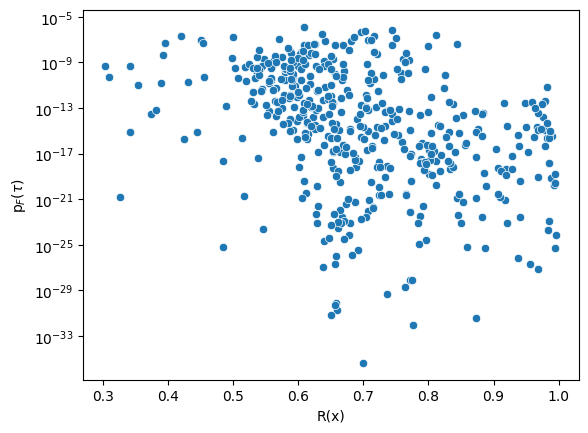

In [20]:
sns.scatterplot(valid_df, x="reward", y="traj_p_F")
plt.yscale("log")
plt.xlabel("R(x)")
plt.ylabel(r"p$_F(\tau)$")
plt.show()

Loss vs. reward R(x). High rewards should have a low loss.

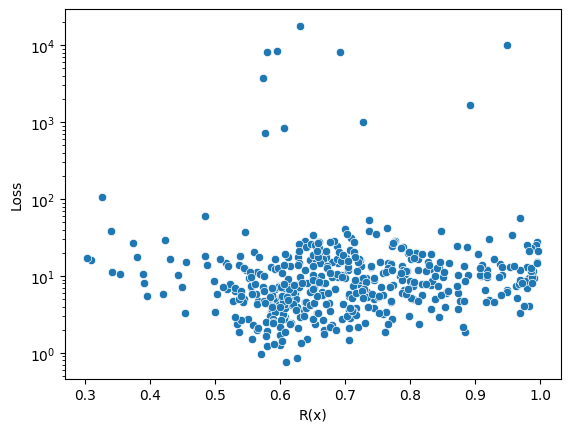

In [21]:
sns.scatterplot(valid_df, x="reward", y="loss")
plt.yscale("log")
plt.xlabel("R(x)")
plt.ylabel(r"Loss")
plt.show()

Loss vs. reward R(x). 

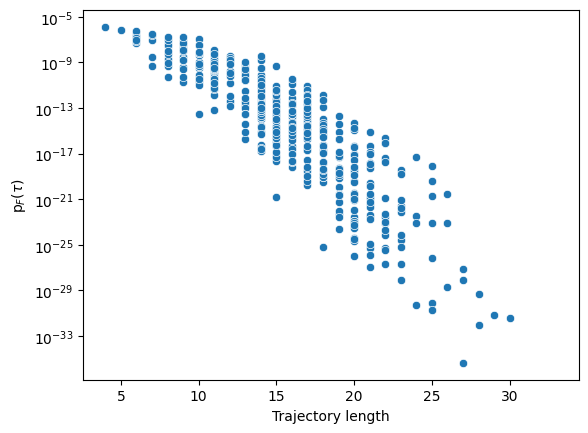

In [22]:
sns.scatterplot(valid_df, x="traj_lens", y="traj_p_F")
plt.yscale("log")
plt.xlabel("Trajectory length")
plt.ylabel(r"p$_F(\tau)$")
plt.show()

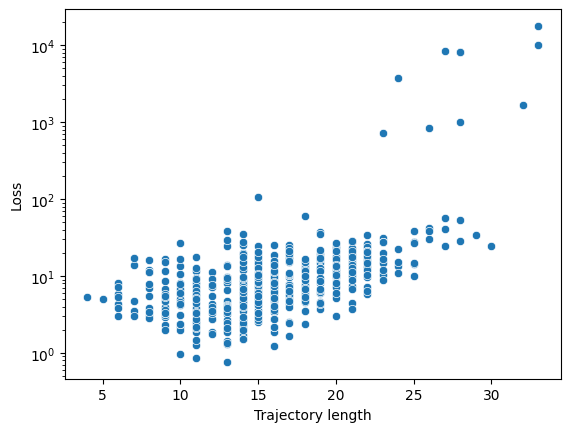

In [23]:
sns.scatterplot(valid_df, x="traj_lens", y="loss")
plt.yscale("log")
plt.xlabel("Trajectory length")
plt.ylabel(r"Loss")
plt.show()

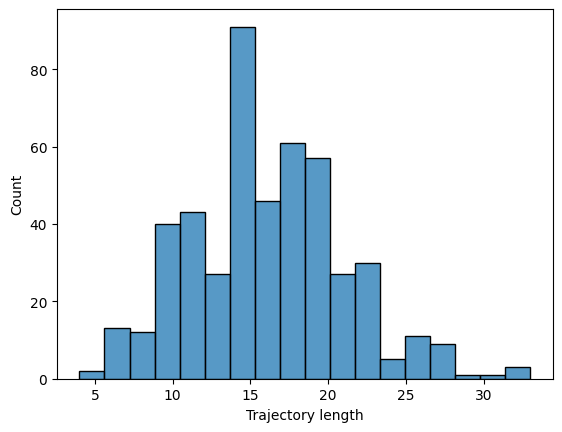

In [24]:
sns.histplot(data=valid_df, x="traj_lens")
plt.xlabel("Trajectory length")
plt.show()

## Analyze

### Training metrics

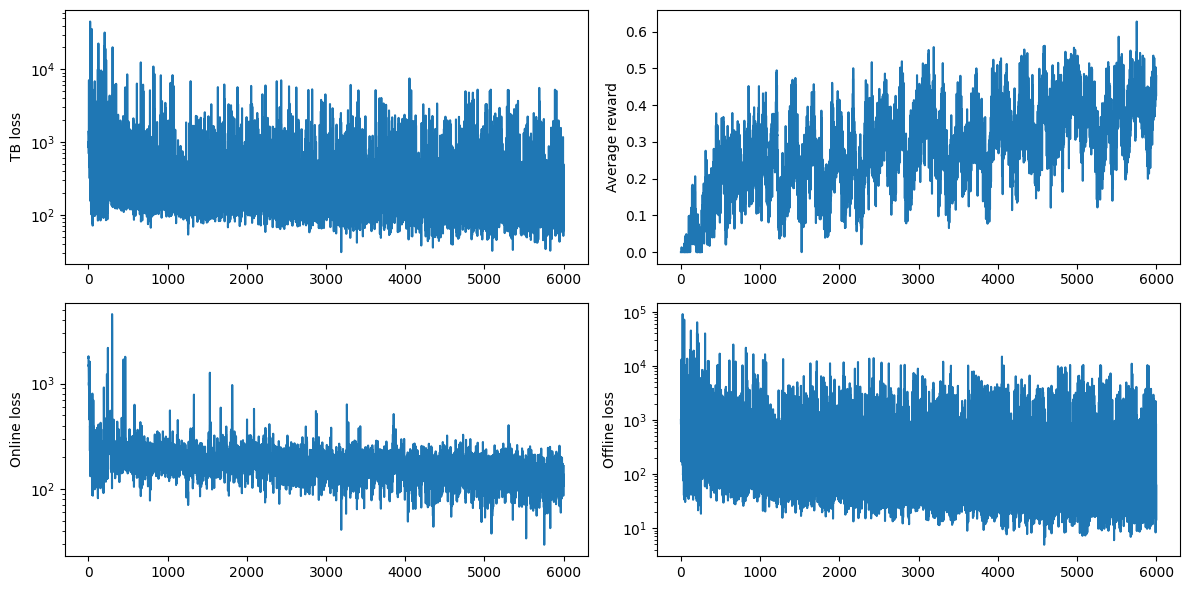

In [25]:
cfg = init_empty(Config())
cfg.log_dir = config.log_dir # Can be modified
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

x = [i+1 for i in range(len(ea.Scalars('train_loss')))]
f, ax = plt.subplots(2, 2, figsize=(4*3,6))
sns.lineplot(y=[i.value for i in ea.Scalars('train_loss')],x=x, ax=ax[0,0])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
sns.lineplot(y=[i.value for i in ea.Scalars('train_sampled_reward_avg')],x=x, ax=ax[0,1])
ax[0,1].set_ylabel('Average reward')
sns.lineplot(y=[i.value for i in ea.Scalars('train_online_loss')],x=x, ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
sns.lineplot(y=[i.value for i in ea.Scalars('train_offline_loss')],x=x, ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
plt.tight_layout()

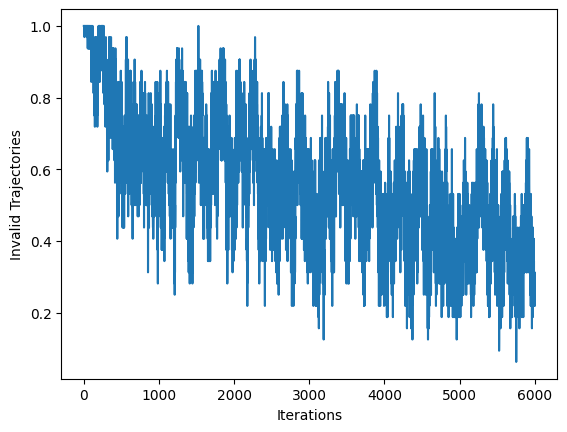

In [26]:
sns.lineplot(y=[i.value for i in ea.Scalars('train_invalid_trajectories')],x=x)
plt.ylabel("Invalid Trajectories")
plt.xlabel("Iterations")
plt.show()

### Molecule visualization

#### Generate New Molecules

In [27]:
def sample_molecules_from_model(gen_trainer, amont=25):
    # Generate molecules
    trajs = gen_trainer.algo.create_training_data_from_own_samples(gen_trainer.model, amont)
    objs = [gen_trainer.ctx.graph_to_obj(i['result']) for i in trajs]
    obj_props, is_valid = gen_trainer.task.compute_obj_properties(objs)
    cond_info = gen_trainer.task.sample_conditional_information(len(obj_props), 1)
    log_rewards = gen_trainer.task.cond_info_to_logreward(cond_info, obj_props)
    
    valid_idcs = torch.tensor([i for i in range(len(trajs)) if trajs[i].get("is_valid", True)]).long()    

    valid_idcs = valid_idcs[is_valid]
    all_fr = torch.zeros((len(trajs), obj_props.shape[1]))
    all_fr[valid_idcs] = obj_props
    rewards = all_fr.flatten()

    return objs, obj_props, is_valid, rewards, log_rewards

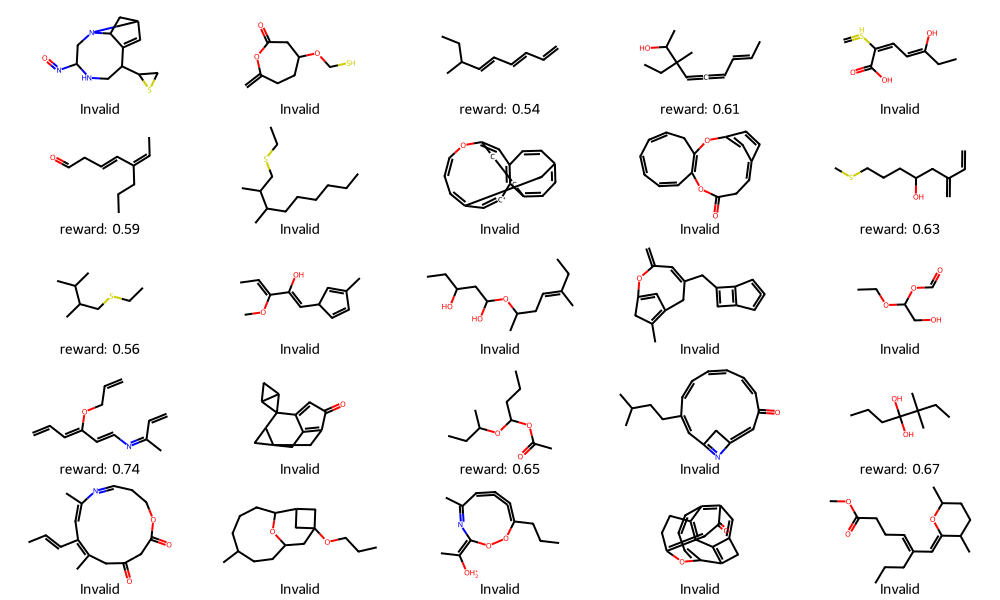

In [28]:
objs, obj_props, is_valid, rewards, log_rewards = sample_molecules_from_model(trainer, amont=25)
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' if r != 0 else "Invalid" for r in rewards  ])

#### Analyse Training Molecules

In [29]:
log_dir = config.log_dir
conn = sqlite3.connect(f"{log_dir}/train/generated_objs_0.db")
training_df = pd.read_sql_query("SELECT * FROM results", conn)
training_df.head()

,smi,r,fr_0
0,,2.678637e-33,0.0
1,,2.678637e-33,0.0
2,,2.678637e-33,0.0
3,,2.678637e-33,0.0
4,,2.678637e-33,0.0


Top molcules

In [30]:
def get_n_top_molecules(n):
    top_rewards = training_df.sort_values(by='r', ascending=False).head(n)
    objs = [Chem.MolFromSmiles(smiles) for smiles in top_rewards["smi"]]
    rewards = top_rewards["r"]
    return objs, rewards

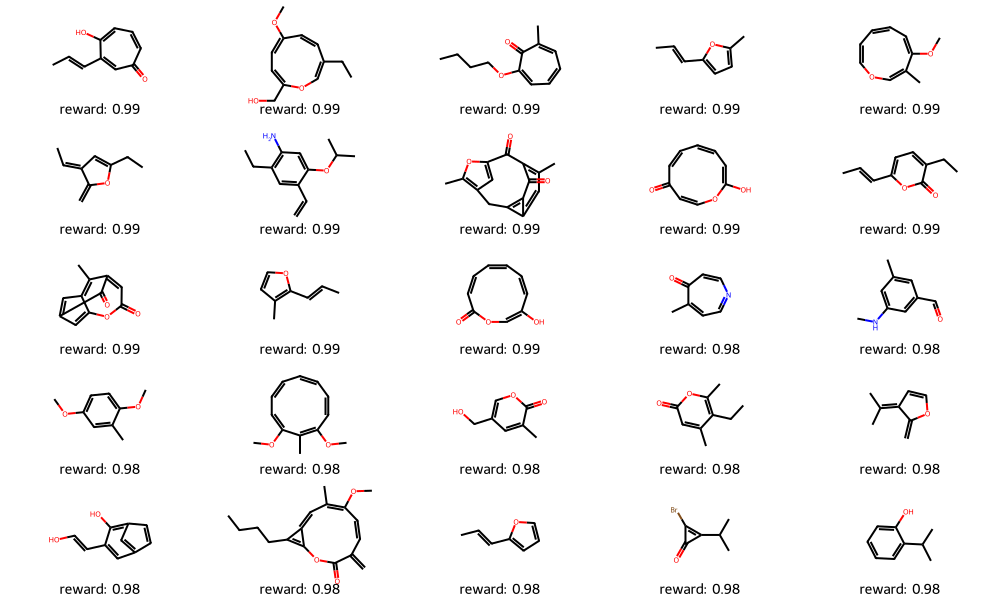

In [31]:
objs, rewards = get_n_top_molecules(25)
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

Get molecules during last training episode

In [32]:
def get_last_molecules(cfg, df):
    n = cfg.algo.valid_num_from_policy
    objs = [Chem.MolFromSmiles(smiles) for smiles in df[-n:]["smi"]]
    rewards = df[-n:]["r"]
    return objs, rewards

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


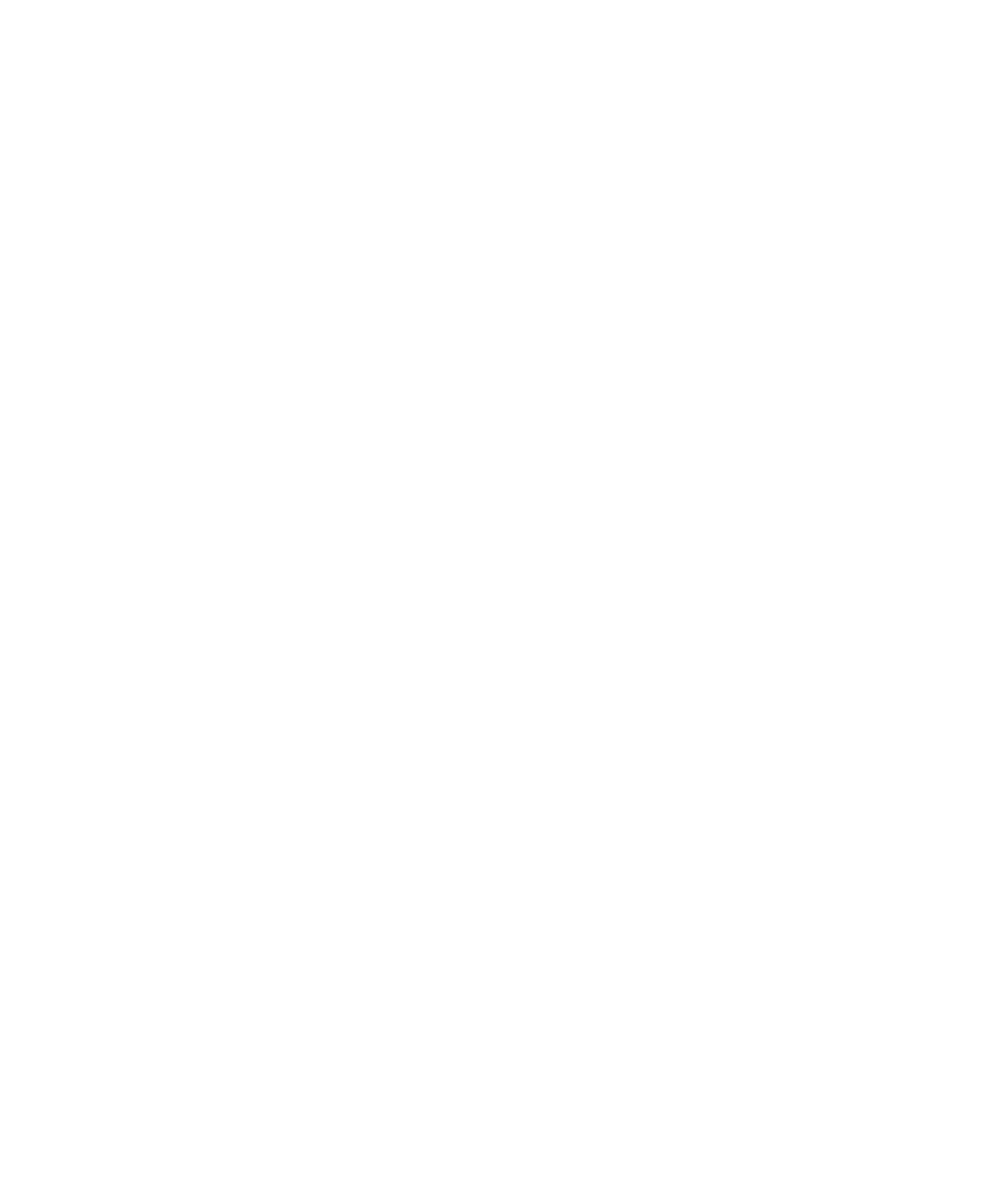

In [33]:
objs, rewards = get_last_molecules(config, training_df) 
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

## Load

Run the [Root](#run-notebook-from-project-root) and [Import](#imports) sections. And some of the plotting functions.

### Initialize

Specify save directory. A copy of this directory will be created for the new trainer object. 

In [ ]:
save_base="example copy 2"
save_index = 2
if save_index != 0:
    save_name = f"{save_base}_{save_index}"
else:
    save_name = save_base

In [ ]:
original_log_dir = os.path.join(root_path, f"logs/{save_name}/")
original_log_dir

### Loading functions

In [ ]:
import re

def increment_name(name):
    # Regex to capture the base name and optional number suffix
    match = re.match(r"^(.*?)(?:_(\d+))?$", name)
    if not match:
        return name + "_1"
    
    base = match.group(1)
    num = match.group(2)
    
    if num is None:
        return f"{base}_1"
    else:
        return f"{base}_{int(num) + 1}"

def init_proceed_training(prev_log_dir):
    if prev_log_dir[-1] == "/":
        new_log_dir = increment_name(prev_log_dir[:-1])
    else:
        new_log_dir = increment_name(prev_log_dir)
    
    if not os.path.exists(new_log_dir):
        shutil.copytree(original_log_dir,new_log_dir)
    else:
        raise FileExistsError(f"Save directory {new_log_dir} already exists - Abort")
    return new_log_dir,prev_log_dir
    

In [ ]:


def load_trainer_from_checkpoint(prev_log_dir: str, trainer_class: type, start_at_step:int=None, num_training_steps:int=None, id:int=0):
    
    log_dir, prev_log_dir = init_proceed_training(prev_log_dir)
    checkpoint_path = os.path.join(log_dir, "model_final_save.pt")
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path, weights_only=False)
    
    # Restore the config
    cfg = checkpoint["cfg"]
    cfg = OmegaConf.to_container(cfg, resolve=True)  
    cfg_obj = OmegaConf.structured(Config)             
    cfg_merged = OmegaConf.merge(cfg_obj, cfg)     
    cfg = OmegaConf.to_object(cfg_merged)  

    if log_dir != cfg.log_dir:
        cfg.log_dir = log_dir

    # Ensure the correct start step
    if start_at_step:
        cfg.start_at_step = start_at_step
    else:
        cfg.start_at_step = cfg.num_training_steps
    print(f"Start at step: {cfg.start_at_step}")

    # Ensure the correct start step
    if num_training_steps:
        cfg.num_training_steps = cfg.start_at_step+num_training_steps
    else:
        cfg.num_training_steps = cfg.start_at_step+cfg.num_training_steps


    # If log_dir exists and shouldn't be overwritten, disable deletion
    cfg.overwrite_existing_exp = True

    # Instantiate the trainer
    trainer = trainer_class(cfg)

    # Load model weights
    trainer.model.load_state_dict(checkpoint["models_state_dict"][0])
    if "sampling_model_state_dict" in checkpoint:
        trainer.sampling_model.load_state_dict(checkpoint["sampling_model_state_dict"][0])
    else:
        trainer.sampling_model.load_state_dict(checkpoint["models_state_dict"][0])
    trainer.model.eval()
    trainer.sampling_model.eval()

    trainer.model.to(trainer.device)
    trainer.sampling_model.to(trainer.device)


    return trainer, cfg, prev_log_dir


In [ ]:

def continue_training(trainer,prev_log_dir):
    trainer.run()
    #with open(os.path.join(prev_log_dir, "train.log"), "r") as f_old, open(os.path.join(trainer.cfg.log_dir, "train.log"), "a") as f_new:
    save_run(trainer)

    gc.collect()
    # Read contents
    with open(os.path.join(prev_log_dir, "train.log"), "r", encoding="utf-8") as f_old:
        old_content = f_old.read()
    with open(os.path.join(trainer.cfg.log_dir, "train.log"), "r", encoding="utf-8") as f_new:
        new_content = f_new.read()

    #   Write new file with old content first
    with open(os.path.join(trainer.cfg.log_dir, "train.log"), "w", encoding="utf-8") as f_new:
        f_new.write(old_content)
        f_new.write(new_content)



In [ ]:
def merge_event_scalars(log_dirs):
    merged_scalars = defaultdict(list)  # tag -> list of events (across all logs)

    for log_dir in log_dirs:
        ea = event_accumulator.EventAccumulator(log_dir)
        ea.Reload()

        # Get all scalar tags in this log directory
        tags = ea.Tags().get('scalars', [])

        for tag in tags:
            merged_scalars[tag].extend(ea.Scalars(tag))

    
    for tag, events in merged_scalars.items():
        merged_scalars[tag] = sorted(events, key=lambda e: e.step)
    return merged_scalars, merged_scalars[tag][-1].step

In [ ]:
def find_immediate_subdirs_with_string(log_dir,substring):
    root_dir = os.path.dirname(log_dir.rstrip("/"))
    return [
        os.path.join(root_dir, d)
        for d in os.listdir(root_dir)
        if os.path.isdir(os.path.join(root_dir, d)) and substring in d
    ]


In [ ]:
def get_training_df(log_dirs):
    training_df = pd.DataFrame()
    for l_dir in log_dirs:
        conn = sqlite3.connect(f"{l_dir}/train/generated_objs_0.db")
        new_training_df = pd.read_sql_query("SELECT * FROM results", conn)
        training_df = pd.concat([training_df, new_training_df], ignore_index=True)
    return training_df

### Initialize Trainer

In [ ]:
log_dirs = find_immediate_subdirs_with_string(original_log_dir,save_base)
log_dirs

In [ ]:
_, start_at_step = merge_event_scalars(log_dirs)
start_at_step

In [ ]:
gc.collect()
trainer, cfg, prev_log_dir = load_trainer_from_checkpoint(original_log_dir, ScentTrainer, start_at_step=start_at_step, num_training_steps=2)

### Continue Training

In [ ]:
continue_training(trainer,prev_log_dir)

### Validation

Ensure that the validation set is the same for reinitialized models (Should be the same due to seed).

In [ ]:
#np.array_equal(old_test_data,trainer.test_data.idcs), np.array_equal(old_training_data,trainer.training_data.idcs)
#old_test_data, old_training_data = trainer.test_data.idcs,trainer.training_data.idcs

#### Run Validation

In [ ]:
batch_idx = trainer.cfg.num_training_steps % max(len(trainer.training_data),1)
epoch_idx = trainer.cfg.num_training_steps // max(len(trainer.training_data),1)
batch_idx,epoch_idx

In [ ]:
validation_config

In [ ]:
validation_config = copy.deepcopy(cfg)
validation_config.algo.valid_num_from_policy= 0
validation_config.algo.valid_num_from_dataset= 1
validation_config.log_dir = trainer.cfg.log_dir[:-1] + "_validation"
validation_trainer = ScentTrainer(validation_config, print_config=False)
validation_trainer.model = copy.deepcopy(trainer.model)
validation_trainer.sampling_model = copy.deepcopy(trainer.model)
validation_trainer.training_data = copy.deepcopy(trainer.training_data)
validation_trainer.test_data = copy.deepcopy(trainer.test_data)

In [ ]:
n_drawn = validation_trainer.cfg.algo.valid_num_from_policy
n_from_dataset = validation_trainer.cfg.algo.valid_num_from_dataset
n_drawn,n_from_dataset

In [ ]:
valid_dl = validation_trainer.build_validation_data_loader()
df = trainer.test_data.df.iloc[validation_trainer.test_data.idcs]
#valid_df = pd.DataFrame()
rows = []



for batch, smiles in zip(valid_dl, df["nonStereoSMILES"]):
    info = validation_trainer.evaluate_batch(batch.to(validation_trainer.device), epoch_idx, batch_idx)
    batch_idx_ = torch.arange(n_from_dataset, device=validation_trainer.device).repeat_interleave(batch.traj_lens)
    cond_info = getattr(batch, "cond_info", None)
    batched_cond_info = cond_info[batch_idx_] if cond_info is not None else None
    fwd_cat, per_graph_out = validation_trainer.model(batch, batched_cond_info)
    log_pF = fwd_cat.log_prob(batch.actions)
    traj_log_p_F = scatter(log_pF, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_p_B = batch.log_p_B
    traj_log_p_B = scatter(log_p_B, batch_idx_, dim=0, dim_size=n_from_dataset, reduce="sum")
    log_rewards = batch.log_rewards

    row = {
        'SMILES': smiles,
        'traj_p_F': traj_log_p_F.exp().item(),  
        'traj_p_B': traj_log_p_B.exp().item(),
        'reward': log_rewards.exp().item()
    }
    row = { **row, **info}
    rows.append(row)
    
    print(f"{smiles:<40} traj_p_F:{traj_log_p_F.exp().item():.5f} traj_p_B:{traj_log_p_B.exp().item():.5f} reward:{log_rewards.exp().item():.2f}" + " ".join(f"{k}:{v:.2f}" for k, v in info.items()))
    gc.collect()
valid_df = pd.DataFrame(rows)

In [ ]:
valid_df.to_csv(os.path.join(trainer.cfg.log_dir, "example_validation.csv"),index=None)
valid_df.head()


### Training Metrics

In [ ]:
log_dirs = find_immediate_subdirs_with_string(original_log_dir,save_base)
log_dirs

In [ ]:

event_scalars, _ = merge_event_scalars(log_dirs)
x = [i+1 for i in range(len(event_scalars['train_loss']))]
f, ax = plt.subplots(2, 2, figsize=(4*3,6))
sns.lineplot(y=[ e.value for e in event_scalars['train_loss']],x=x, ax=ax[0,0])
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('TB loss')
sns.lineplot(y=[ e.value for e in event_scalars['train_sampled_reward_avg']],x=x, ax=ax[0,1])
ax[0,1].set_ylabel('Average reward')
sns.lineplot(y=[ e.value for e in event_scalars['train_online_loss']],x=x, ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Online loss')
sns.lineplot(y=[ e.value for e in event_scalars['train_offline_loss']],x=x, ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Offline loss')
plt.tight_layout()

### Generate Molecules

In [ ]:
objs, obj_props, is_valid, rewards, log_rewards = sample_molecules_from_model(trainer, amont=25)
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' if r != 0 else "Invalid" for r in rewards  ])

### Analyse Training Molecules

In [ ]:
training_df = get_training_df(log_dirs)

In [ ]:
objs, rewards = get_n_top_molecules(25)
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

In [ ]:
objs, rewards = get_last_molecules(trainer.cfg, training_df) 
MolsToGridImage(objs, molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r:.2f}' for r in rewards])

### Old code

In [ ]:
#log_dir = os.path.join(root_path, "logs/example copy 2/")
# Model class must be defined somewhere
#log_dir = os.path.join(root_path, "logs/example copy/")
#state = torch.load(os.path.join(log_dir, "model_final_save.pt"), weights_only=False)
#config = state["cfg"]
#env_ctx = state["env_ctx"]
#model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
#model.load_state_dict(state["models_state_dict"][0])
#model.eval()

In [ ]:
#retrainer = ScentTrainer(config, print_config=True)

In [ ]:
#algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])

In [ ]:
#ctx = MolBuildingEnvContext(
            #['Br', 'C', 'Cl', 'F', 'Fe', 'N', 'Na', 'O', 'S'],
            #chiral_types=[Chem.rdchem.ChiralType.CHI_UNSPECIFIED],  # disable chirality
           # expl_H_range=[0,1],
            #num_cond_dim=1,
            #max_nodes=20,
        #)

In [ ]:
# Generate molecules
#trajs = algo.create_training_data_from_own_samples(model, 25)
#objs = [ctx.graph_to_obj(i['result']) for i in trajs]
M#olsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))